<a href="https://colab.research.google.com/github/CristianCristanchoT/API-REST-TF2/blob/master/SERVING_IN_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.2.0rc3

     |████████████████████████████████| 516.2MB 29kB/s 
     |████████████████████████████████| 3.0MB 45kB/s 
     |████████████████████████████████| 460kB 55.4MB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import requests
r = requests.get('https://api.ipify.org?format=json')
j = r.json()
print(j)

{'ip': '35.235.114.24'}


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.models import Model


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0 , x_test / 255.0

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [0]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1874/1875 [============================>.] - ETA: 0s - loss: 0.5148 - accuracy: 0.8084WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2f1c5b5bf8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

In [0]:
#Salvar el modelo 

import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

if os.path.isdir(export_path):
  print('\nModelo salvado, realizando limpieza\n')
  !rm -r {export_path}

tf.saved_model.save(model, export_path)

print('\nModelo salvado:')
!ls -l {export_path}

export_path = /tmp/1

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets

Modelo salvado:
total 168
drwxr-xr-x 2 root root   4096 Apr 19 03:32 assets
-rw-r--r-- 1 root root 161717 Apr 19 03:32 saved_model.pb
drwxr-xr-x 2 root root   4096 Apr 19 03:32 variables


In [0]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Defined Functions:
  Function Name: '__call__'
  

In [0]:

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  19620      0 --:--:-- --:--:-- --:--:-- 19490
OK
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hi

In [0]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 175 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.1.0 [175 MB]
Fetched 175 MB in 3s (61.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.1.0_all.deb ...
Unpacking tensorflow-model-server (2.1.0) ...
Setting up tensorflow-model-server (2.1.0) ...


In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [0]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 238] NET_LOG: Entering the event loop ...


In [0]:
labels = '''Camiseta
Pantalon
Sueter
Vestido
Saco
Sandalia
Camisa
Zapatillas
Maleta
Botas'''.split("\n")

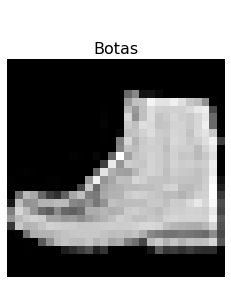

In [0]:
def show(idx, title):
    plt.figure()
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('\n\n{}'.format(title), fontdict={'size':16})

i = np.random.randint(0, len(x_test))
show(i, labels[y_test[i]])

In [0]:
import json

data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

In [0]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
j = r.json()
print(j.keys())
print(j)

dict_keys(['predictions'])
{'predictions': [[6.60461963e-12, 9.52445655e-14, 9.61349576e-12, 5.31116509e-15, 9.3394178e-14, 2.61513144e-09, 3.81269398e-13, 7.57186536e-10, 1.5022441e-14, 1.0], [6.09190693e-07, 3.06226941e-14, 0.998798966, 2.70816486e-07, 1.9275416e-05, 1.51553422e-14, 0.00118089863, 3.08610737e-16, 2.52980948e-12, 6.07380327e-16], [8.16452301e-26, 1.0, 0.0, 9.60225277e-29, 2.77569246e-31, 2.11813844e-38, 7.34970148e-37, 0.0, 2.25587484e-37, 0.0]]}


In [0]:
pred = np.array(j['predictions'])
print(pred.shape)

(3, 10)


In [0]:
pred = pred.argmax(axis=1)

In [0]:
pred = [labels[i] for i in pred]
print(pred)

['Botas', 'Sueter', 'Pantalon']


In [0]:
actual = [labels[i] for i in y_test[:3]]
print(actual)

['Botas', 'Sueter', 'Pantalon']


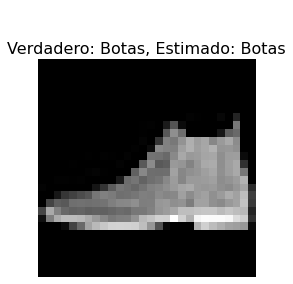

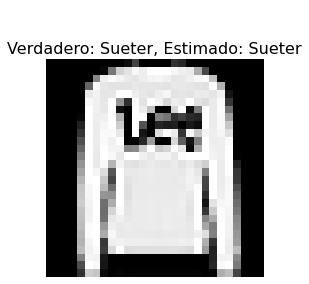

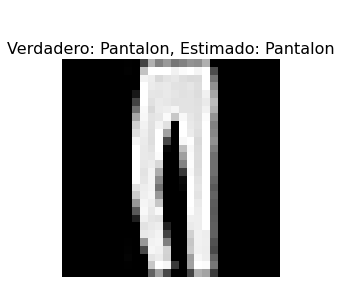

In [0]:
for i in range(0,3):
  show(i, f"Verdadero: {actual[i]}, Estimado: {pred[i]}")

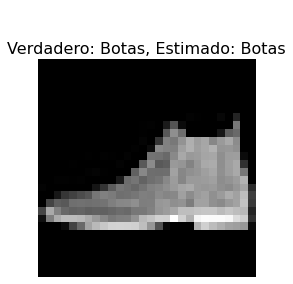

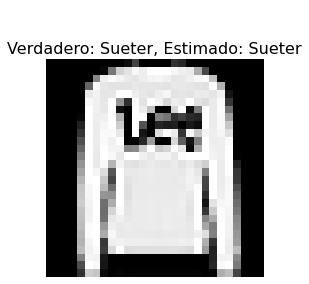

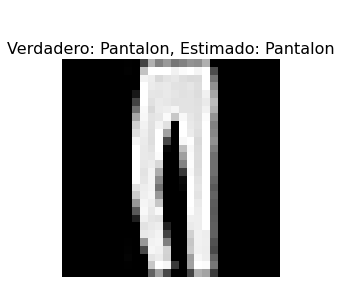

In [0]:
#Ahora, seleccionando un modelo en particular, en caso de tener multiples modelos ejecutandose en el server

headers = {"content-type": "application/json"}
#r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers) -Antiguo
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
j = r.json()

pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]

for i in range(0,3):
  show(i, f"Verdadero: {actual[i]}, Estimado: {pred[i]}")

In [0]:
#Ahora se crea un segundo modelo mas simple para testear

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1862/1875 [============================>.] - ETA: 0s - loss: 0.4631 - accuracy: 0.8387WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2f0c2d46a8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

In [0]:
version = 2
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

if os.path.isdir(export_path):
  print('\nModelo salvado, realizando limpieza\n')
  !rm -r {export_path}

tf.saved_model.save(model, export_path)

print('\nModelo salvado:')
!ls -l {export_path}

export_path = /tmp/2

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /tmp/2/assets

Modelo salvado:
total 168
drwxr-xr-x 2 root root   4096 Apr 19 04:30 assets
-rw-r--r-- 1 root root 161948 Apr 19 04:30 saved_model.pb
drwxr-xr-x 2 root root   4096 Apr 19 04:30 variables


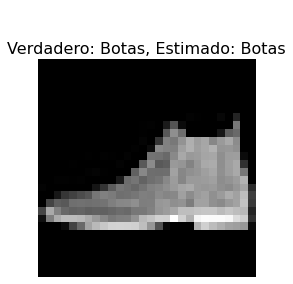

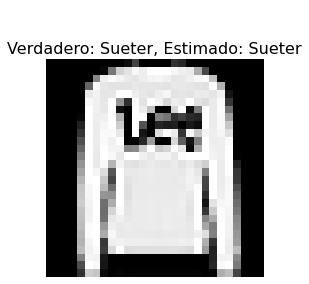

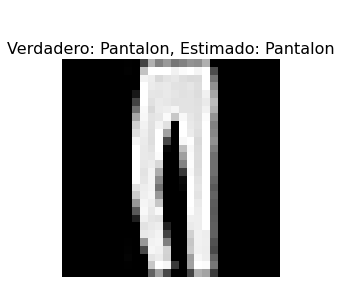

In [0]:
headers = {"content-type": "application/json"}
#r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers) -Antiguo
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/2:predict', data=data, headers=headers)
j = r.json()

pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]

for i in range(0,3):
  show(i, f"Verdadero: {actual[i]}, Estimado: {pred[i]}")

In [0]:
#Y ahora que pasa al solicitar un modelo que no existe?

headers = {"content-type": "application/json"}
#r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers) -Antiguo
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/3:predict', data=data, headers=headers)
j = r.json()

print(j)

{'error': 'Servable not found for request: Specific(fashion_model, 3)'}
